In [1]:
import numpy as np 
import pandas as pd 
import os

In [25]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
holiday_data = pd.read_csv("holidays_events.csv")
oil_data = pd.read_csv("oil.csv")
stores_data = pd.read_csv("stores.csv")
transactions_data = pd.read_csv("transactions.csv")

In [3]:
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
print(train_data.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [7]:
print(test_data.isnull().sum())

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


In [5]:
holiday_data

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [112]:
holiday_data.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [ ]:
holiday_data["type"].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [110]:
holiday_data["locale"].unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [111]:
holiday_data["locale_name"].unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

In [7]:
print(holiday_data.isnull().sum())

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [8]:
oil_data

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [11]:
print(oil_data.isnull().sum())

date           0
dcoilwtico    43
dtype: int64


In [14]:
print(stores_data.isnull().sum())

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


In [15]:
transactions_data

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [16]:
print(transactions_data.isnull().sum())

date            0
store_nbr       0
transactions    0
dtype: int64


### Handling missing values

In [26]:
oil_data['dcoilwtico'].ffill(inplace=True) 
oil_data['dcoilwtico'].bfill(inplace=True) 

In [122]:
print(oil_data.isnull().sum())

date          0
dcoilwtico    0
dtype: int64


### Holiday data

In [27]:
# National Holidays (merged on date) 
national_holidays = holiday_data[holiday_data['locale'] == 'National'].copy()
national_holidays['is_national_holiday'] = 1
# Handle transferred days correctly
national_holidays.loc[national_holidays['transferred'] == True, 'is_national_holiday'] = 0
national_holidays = national_holidays[['date', 'is_national_holiday']]
national_holidays.drop_duplicates(inplace=True)

In [28]:
# Regional Holidays (merged on date and state) ---
regional_holidays = holiday_data[holiday_data['locale'] == 'Regional'].copy()
# Rename 'locale_name' to 'state' to allow for a correct merge
regional_holidays.rename(columns={'locale_name': 'state'}, inplace=True)
regional_holidays['is_regional_holiday'] = 1
regional_holidays.loc[regional_holidays['transferred'] == True, 'is_regional_holiday'] = 0
regional_holidays = regional_holidays[['date', 'state', 'is_regional_holiday']]
regional_holidays.drop_duplicates(inplace=True)

In [29]:
# Local Holidays (merged on date and city) ---
local_holidays = holiday_data[holiday_data['locale'] == 'Local'].copy()
# Rename 'locale_name' to 'city' to allow for a correct merge
local_holidays.rename(columns={'locale_name': 'city'}, inplace=True)
local_holidays['is_local_holiday'] = 1
local_holidays.loc[local_holidays['transferred'] == True, 'is_local_holiday'] = 0
local_holidays = local_holidays[['date', 'city', 'is_local_holiday']]
local_holidays.drop_duplicates(inplace=True)

### Merging all other dataframes into train and test data frames

In [30]:
train_data = pd.merge(train_data, stores_data, on='store_nbr', how='left')
train_data = pd.merge(train_data, transactions_data, on=['date', 'store_nbr'], how='left')
train_data = pd.merge(train_data, oil_data, on='date', how='left')
train_data['transactions'].fillna(0, inplace=True)
train_data['dcoilwtico'] = train_data['dcoilwtico'].ffill()

In [31]:
train_data = pd.merge(train_data, national_holidays, on='date', how='left')
train_data = pd.merge(train_data, regional_holidays, on=['date', 'state'], how='left')
train_data = pd.merge(train_data, local_holidays, on=['date', 'city'], how='left')

train_data['is_national_holiday'].fillna(0, inplace=True)
train_data['is_regional_holiday'].fillna(0, inplace=True)
train_data['is_local_holiday'].fillna(0, inplace=True)

In [160]:
train_data.head(10)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,transactions,dcoilwtico,is_national_holiday,is_regional_holiday,is_local_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,93.14,1.0,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,93.14,1.0,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,93.14,1.0,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,93.14,1.0,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,93.14,1.0,0.0,0.0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,Quito,Pichincha,D,13,NaN,93.14,1.0,0.0,0.0
6,6,2013-01-01,1,CELEBRATION,0.0,0,Quito,Pichincha,D,13,NaN,93.14,1.0,0.0,0.0
7,7,2013-01-01,1,CLEANING,0.0,0,Quito,Pichincha,D,13,NaN,93.14,1.0,0.0,0.0
8,8,2013-01-01,1,DAIRY,0.0,0,Quito,Pichincha,D,13,NaN,93.14,1.0,0.0,0.0
9,9,2013-01-01,1,DELI,0.0,0,Quito,Pichincha,D,13,NaN,93.14,1.0,0.0,0.0


In [32]:
test_data = pd.merge(test_data, stores_data, on='store_nbr', how='left')
test_data = pd.merge(test_data, transactions_data, on=['date', 'store_nbr'], how='left')
test_data = pd.merge(test_data, oil_data, on='date', how='left')
test_data['transactions'].fillna(0, inplace=True)
test_data['dcoilwtico'] = test_data['dcoilwtico'].ffill()

In [33]:
test_data = pd.merge(test_data, national_holidays, on='date', how='left')
test_data = pd.merge(test_data, regional_holidays, on=['date', 'state'], how='left')
test_data = pd.merge(test_data, local_holidays, on=['date', 'city'], how='left')

test_data['is_national_holiday'].fillna(0, inplace=True)
test_data['is_regional_holiday'].fillna(0, inplace=True)
test_data['is_local_holiday'].fillna(0, inplace=True)

In [163]:
train_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type', 'cluster', 'transactions', 'dcoilwtico',
       'is_national_holiday', 'is_regional_holiday', 'is_local_holiday'],
      dtype='object')

In [34]:
print(train_data.shape)
print(test_data.shape)

(3000888, 15)
(28512, 14)


### Basic date based features 

In [35]:
train_data["date"] = pd.to_datetime(train_data["date"])
test_data["date"] = pd.to_datetime(test_data["date"])

In [36]:
train_data['year'] = train_data['date'].dt.year
train_data['dayofyear'] = train_data['date'].dt.dayofyear
train_data['quarter'] = train_data['date'].dt.quarter
train_data['is_weekend'] = (train_data['date'].dt.dayofweek >= 5).astype(int)

test_data['year'] = test_data['date'].dt.year
test_data['dayofyear'] = test_data['date'].dt.dayofyear
test_data['quarter'] = test_data['date'].dt.quarter
test_data['is_weekend'] = (test_data['date'].dt.dayofweek >= 5).astype(int)


### Cyclic features with Sin & Cos transformation

In [37]:
train_data['month_sin'] = np.sin(2 * np.pi * train_data['date'].dt.month / 12)
train_data['month_cos'] = np.cos(2 * np.pi * train_data['date'].dt.month / 12)
train_data['dayofweek_sin'] = np.sin(2 * np.pi * train_data['date'].dt.dayofweek / 7)
train_data['dayofweek_cos'] = np.cos(2 * np.pi * train_data['date'].dt.dayofweek / 7)

test_data['month_sin'] = np.sin(2 * np.pi * test_data['date'].dt.month / 12)
test_data['month_cos'] = np.cos(2 * np.pi * test_data['date'].dt.month / 12)
test_data['dayofweek_sin'] = np.sin(2 * np.pi * test_data['date'].dt.dayofweek / 7)
test_data['dayofweek_cos'] = np.cos(2 * np.pi * test_data['date'].dt.dayofweek / 7)

#### Holiday & Special Event Features

In [38]:
train_data['is_holiday'] = train_data[['is_national_holiday', 'is_regional_holiday', 'is_local_holiday']].max(axis=1)
test_data['is_holiday'] = test_data[['is_national_holiday', 'is_regional_holiday', 'is_local_holiday']].max(axis=1)

### Payday Feature

In [39]:
# Wages are paid on the 15th and last day of the month
train_data['is_payday'] = np.where(
    (train_data['date'].dt.day == 15) | (train_data['date'].dt.is_month_end),
    1, 0
)

test_data['is_payday'] = np.where(
    (test_data['date'].dt.day == 15) | (test_data['date'].dt.is_month_end),
    1, 0
)

### Earthquake feature

In [40]:
# Creating a flag for few week after earthquake event in 2016
earthquake_start = pd.to_datetime('2016-04-16')
earthquake_end = pd.to_datetime('2016-05-31')
train_data['post_earthquake_effect'] = np.where(
    (train_data['date'] >= earthquake_start) & (train_data['date'] <= earthquake_end),
    1, 0
)
test_data['post_earthquake_effect'] = np.where(
    (test_data['date'] >= earthquake_start) & (test_data['date'] <= earthquake_end),
    1, 0
)

In [41]:
print(train_data.shape)
print(test_data.shape)

(3000888, 26)
(28512, 25)


In [206]:
print(train_data.isnull().sum())

id                        0
date                      0
store_nbr                 0
family                    0
sales                     0
onpromotion               0
city                      0
state                     0
type                      0
cluster                   0
transactions              0
dcoilwtico                0
is_national_holiday       0
is_regional_holiday       0
is_local_holiday          0
year                      0
dayofyear                 0
quarter                   0
is_weekend                0
month_sin                 0
month_cos                 0
dayofweek_sin             0
dayofweek_cos             0
is_holiday                0
is_payday                 0
post_earthquake_effect    0
dtype: int64


In [209]:
print(test_data.isnull().sum())

id                            0
date                          0
store_nbr                     0
family                        0
onpromotion                   0
city                          0
state                         0
type                          0
cluster                       0
transactions                  0
dcoilwtico                    0
is_national_holiday           0
is_regional_holiday           0
is_local_holiday              0
year                          0
dayofyear                     0
quarter                       0
is_weekend                    0
month_sin                     0
month_cos                     0
dayofweek_sin                 0
dayofweek_cos                 0
is_holiday                    0
is_payday                     0
post_earthquake_effect        0
source                        0
sales                     28512
dtype: int64


### Lag features

#### The test data is for a 16-day period (from Aug 16 to Aug 31).So we cannot create any lag features lower than 16 days since those data is not available 

#### Before creating any lag or rolling features we need to merge the train_data and test_data 

In [69]:
# Add an identifier column to distinguish between train and test sets
train_data['source'] = 'train'
test_data['source'] = 'test'
test_data['sales'] = np.nan
df = pd.concat([train_data, test_data], ignore_index=True, sort=False)

In [70]:
lags = [16, 21, 28]
for lag in lags:
    df[f'sales_lag_{lag}'] = df.groupby(['store_nbr', 'family'])['sales'].shift(lag)

windows = [7, 14, 28]
for window in windows:
    rolling_series_mean = df.groupby(['store_nbr', 'family'])[f'sales_lag_16'].rolling(window).mean()
    rolling_series_std = df.groupby(['store_nbr', 'family'])[f'sales_lag_16'].rolling(window).std()

    df[f'sales_rolling_mean_{window}'] = rolling_series_mean.reset_index(level=[0,1], drop=True)
    df[f'sales_rolling_std_{window}'] = rolling_series_std.reset_index(level=[0,1], drop=True)




In [71]:
df.shape

(3029400, 36)

In [45]:
print(df.isnull().sum())

id                            0
date                          0
store_nbr                     0
family                        0
sales                     28512
onpromotion                   0
city                          0
state                         0
type                          0
cluster                       0
transactions                  0
dcoilwtico                    0
is_national_holiday           0
is_regional_holiday           0
is_local_holiday              0
year                          0
dayofyear                     0
quarter                       0
is_weekend                    0
month_sin                     0
month_cos                     0
dayofweek_sin                 0
dayofweek_cos                 0
is_holiday                    0
is_payday                     0
post_earthquake_effect        0
source                        0
sales_lag_16              28512
sales_lag_21              37422
sales_lag_28              49896
sales_rolling_mean_7      39204
sales_ro

In [72]:
df.fillna(0, inplace=True)

In [73]:
print(df.isnull().sum())

id                        0
date                      0
store_nbr                 0
family                    0
sales                     0
onpromotion               0
city                      0
state                     0
type                      0
cluster                   0
transactions              0
dcoilwtico                0
is_national_holiday       0
is_regional_holiday       0
is_local_holiday          0
year                      0
dayofyear                 0
quarter                   0
is_weekend                0
month_sin                 0
month_cos                 0
dayofweek_sin             0
dayofweek_cos             0
is_holiday                0
is_payday                 0
post_earthquake_effect    0
source                    0
sales_lag_16              0
sales_lag_21              0
sales_lag_28              0
sales_rolling_mean_7      0
sales_rolling_std_7       0
sales_rolling_mean_14     0
sales_rolling_std_14      0
sales_rolling_mean_28     0
sales_rolling_std_28

### Handling categorical features

In [104]:
df.dtypes

id                                 int64
date                      datetime64[ns]
store_nbr                          int64
family                            object
sales                            float64
onpromotion                        int64
city                              object
state                             object
store_type                        object
cluster                            int64
transactions                     float64
dcoilwtico                       float64
year                               int32
dayofyear                          int32
quarter                            int32
is_weekend                         int32
month_sin                        float64
month_cos                        float64
dayofweek_sin                    float64
dayofweek_cos                    float64
is_holiday_day                     int32
is_work_day                        int32
is_payday                          int32
post_earthquake_effect             int32
source          

In [106]:
df["family"].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [107]:
df["city"].unique()

array(['Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra',
       'Santo Domingo', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil',
       'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad',
       'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [105]:
df["state"].unique()

array(['Pichincha', 'Cotopaxi', 'Chimborazo', 'Imbabura',
       'Santo Domingo de los Tsachilas', 'Bolivar', 'Pastaza',
       'Tungurahua', 'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja',
       'El Oro', 'Esmeraldas', 'Manabi'], dtype=object)

In [108]:
df["store_type"].unique()

array(['D', 'C', 'B', 'E', 'A'], dtype=object)

In [152]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type', 'cluster', 'transactions', 'dcoilwtico',
       'is_national_holiday', 'is_regional_holiday', 'is_local_holiday',
       'year', 'dayofyear', 'quarter', 'is_weekend', 'month_sin', 'month_cos',
       'dayofweek_sin', 'dayofweek_cos', 'is_holiday', 'is_payday',
       'post_earthquake_effect', 'source', 'sales_lag_16', 'sales_lag_21',
       'sales_lag_28', 'sales_rolling_mean_7', 'sales_rolling_std_7',
       'sales_rolling_mean_14', 'sales_rolling_std_14',
       'sales_rolling_mean_28', 'sales_rolling_std_28'],
      dtype='object')

#### Converting columns to 'category' dtype

In [74]:
categorical_cols = [
    'store_nbr', 
    'family', 
    'city', 
    'state', 
    'type', 
    'cluster'
]
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [ ]:
# categorical_cols = [
#     'store_nbr', 
#     'family', 
#     'city', 
#     'state', 
#     'type', 
#     'cluster'
# ]

# df_ohe = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# print(f"New shape after one-hot encoding: {df_ohe.shape}")

New shape after one-hot encoding: (3029400, 171)


### Separation of data again to train and test

In [75]:
train_final = df[df['source'] == 'train'].copy()
test_final = df[df['source'] == 'test'].copy()

# Drop the helper columns
train_final.drop(columns=['source'], inplace=True)
test_final.drop(columns=['source'], inplace=True)
test_final.drop(columns=['sales'], inplace=True, errors='ignore')


In [ ]:
# train_final_ohe = df_ohe[df_ohe['source'] == 'train'].copy()
# test_final_ohe = df_ohe[df_ohe['source'] == 'test'].copy()

# # Drop the helper columns
# train_final_ohe.drop(columns=['source'], inplace=True)
# test_final_ohe.drop(columns=['source'], inplace=True)
# test_final_ohe.drop(columns=['sales'], inplace=True, errors='ignore')


In [49]:
print(train_final_ohe.isnull().sum())


id              0
date            0
sales           0
onpromotion     0
transactions    0
               ..
cluster_13      0
cluster_14      0
cluster_15      0
cluster_16      0
cluster_17      0
Length: 170, dtype: int64


In [50]:
test_final_ohe.isnull().sum()

id              0
date            0
onpromotion     0
transactions    0
dcoilwtico      0
               ..
cluster_13      0
cluster_14      0
cluster_15      0
cluster_16      0
cluster_17      0
Length: 169, dtype: int64

In [77]:
print(train_final.shape)
print(test_final.shape)

(3000888, 35)
(28512, 34)


### EDA

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

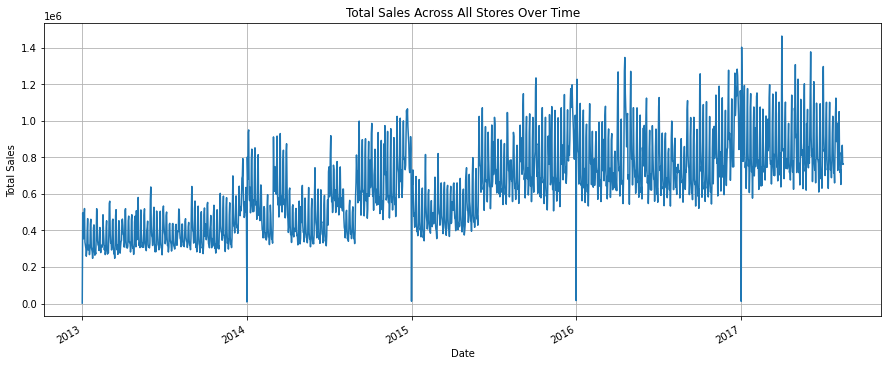

In [ ]:
# Total Sales Over Time
plt.figure(figsize=(15, 6))
train_final.groupby('date')['sales'].sum().plot()
plt.title('Total Sales Across All Stores Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

There is a clear increasing trend

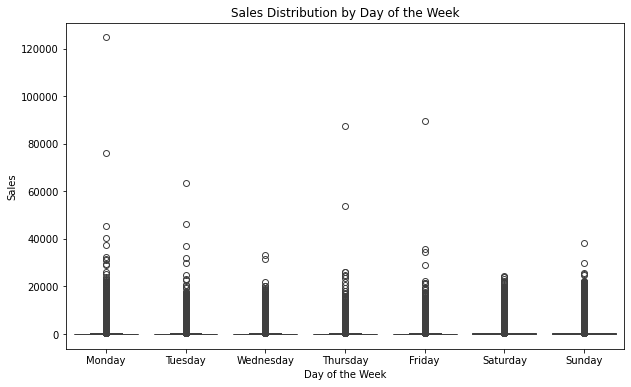

In [ ]:
# Average Sales by Day of the Week
plt.figure(figsize=(10, 6))
train_final['day_name'] = train_final['date'].dt.day_name()
sns.boxplot(data=train_final, x='day_name', y='sales', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

Sales are higher in Monday.

<ipython-input-223-6bea6646dbdf>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  family_sales = train_final.groupby('family')['sales'].sum().sort_values(ascending=False)


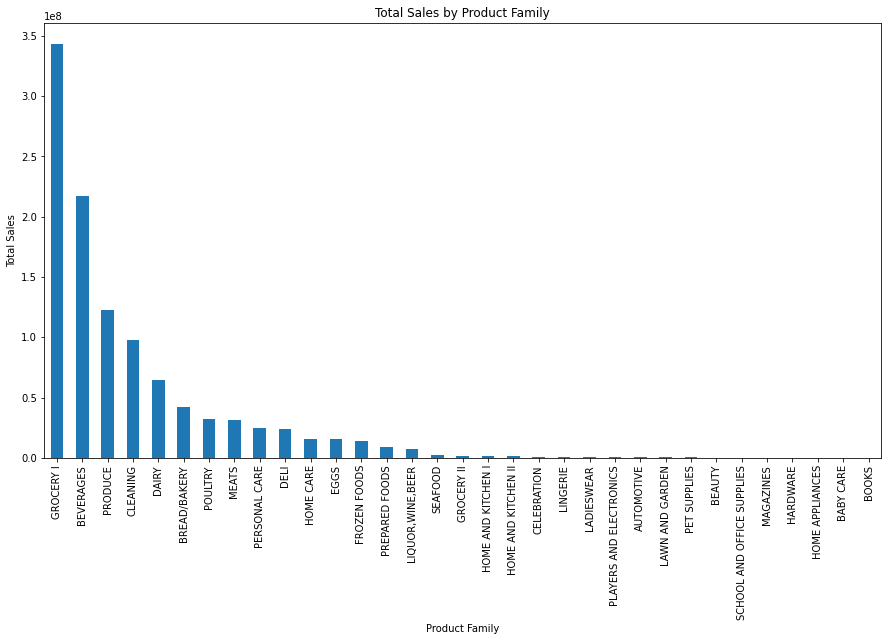

In [223]:
# Sales by Product Family
plt.figure(figsize=(15, 8))
family_sales = train_final.groupby('family')['sales'].sum().sort_values(ascending=False)
family_sales.plot(kind='bar')
plt.title('Total Sales by Product Family')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

GROCERY,BEVERAGES,PRODUCE,CLEANING and DIARY are best selling product families.

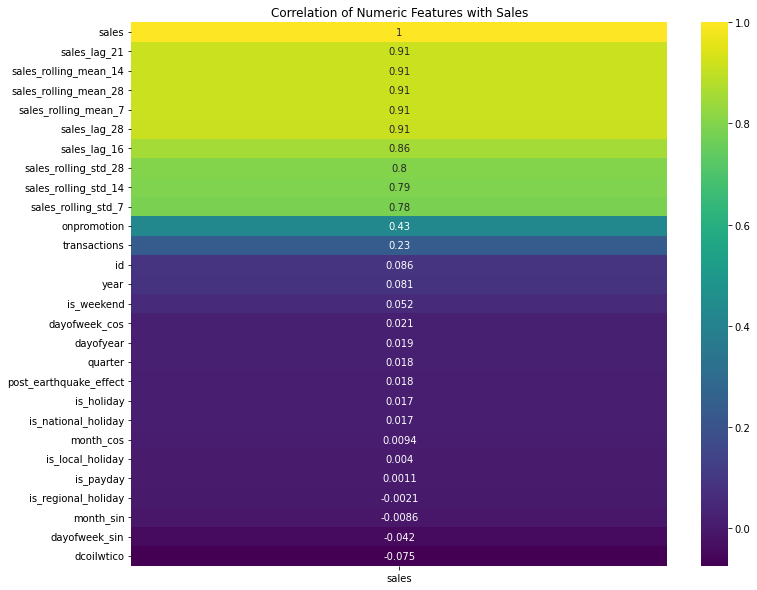

In [54]:
# Correlation Heatmap
numeric_cols = train_final_ohe.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = train_final_ohe[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['sales']].sort_values(by='sales', ascending=False), annot=True, cmap='viridis')
plt.title('Correlation of Numeric Features with Sales')
plt.show()

The lag and rolling features created are higly correlated with the target.

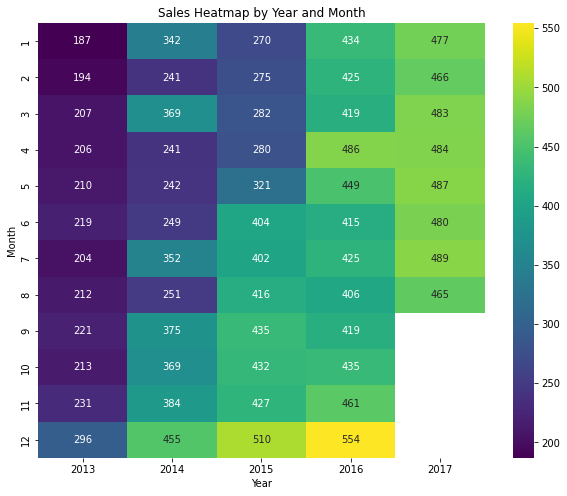

In [235]:
#  Time Series Heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = pd.pivot_table(train_final, values='sales', 
                              index=train_final['date'].dt.month, 
                              columns=train_final['date'].dt.year)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f")
plt.title('Sales Heatmap by Year and Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

Sales are getting higher month by month, most of the time.This confirms strong yearly seasonality.
Sales of the year get higher as we move from left (2013) to right (2017).This confirms the overall upward trend in sales over time.

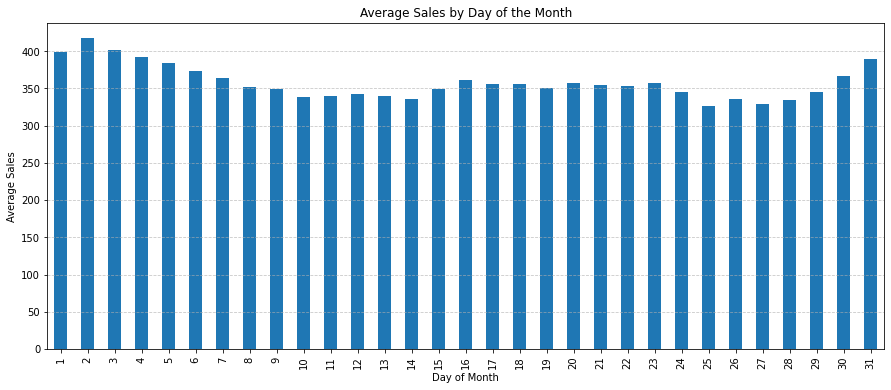

In [236]:
# Average Sales by Day of Month
plt.figure(figsize=(15, 6))
# Group by the day of the month and find the average sales
train_final.groupby(train_final['date'].dt.day)['sales'].mean().plot(kind='bar')
plt.title('Average Sales by Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

There are spikes in sales right around the 15th and again at the end of the month.

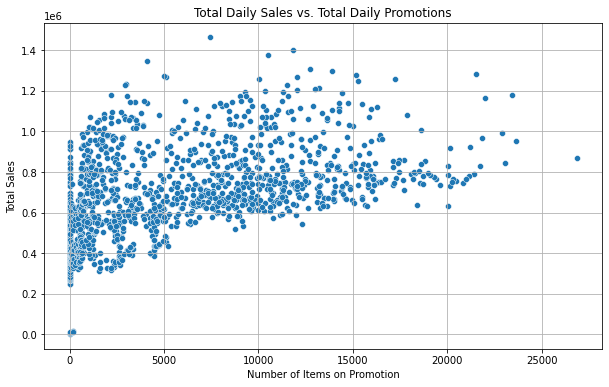

In [238]:
# Sales and onpromotion
# Group data by date to get daily totals
daily_data = train_final.groupby('date').agg({'sales': 'sum', 'onpromotion': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_data, x='onpromotion', y='sales')
plt.title('Total Daily Sales vs. Total Daily Promotions')
plt.xlabel('Number of Items on Promotion')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Days with a higher number of promotions also have higher sales. This confirms that the onpromotion feature is a good predictor.

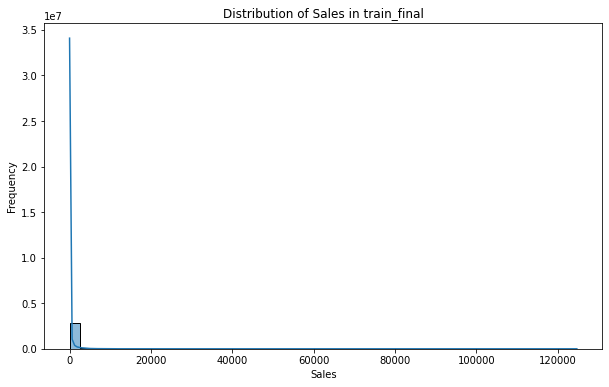

In [257]:
# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(train_final['sales'], bins=50, kde=True)
plt.title('Distribution of Sales in train_final')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [258]:
print(train_final['sales'].value_counts())

sales
0.000       939130
1.000       115291
2.000        85959
3.000        68575
4.000        57846
             ...  
116.541          1
363.533          1
141.322          1
409.879          1
2419.729         1
Name: count, Length: 379610, dtype: int64


### Model Training and Validation


In [241]:
train_final.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type', 'cluster', 'transactions', 'dcoilwtico',
       'is_national_holiday', 'is_regional_holiday', 'is_local_holiday',
       'year', 'dayofyear', 'quarter', 'is_weekend', 'month_sin', 'month_cos',
       'dayofweek_sin', 'dayofweek_cos', 'is_holiday', 'is_payday',
       'post_earthquake_effect', 'sales_lag_16', 'sales_lag_21',
       'sales_lag_28', 'sales_rolling_mean_7', 'sales_rolling_std_7',
       'sales_rolling_mean_14', 'sales_rolling_std_14',
       'sales_rolling_mean_28', 'sales_rolling_std_28'],
      dtype='object')

In [78]:
TARGET = 'sales'
## For optimizing RMSLE, we predict the log of sales.
y = np.log1p(train_final[TARGET])

features = train_final.drop(columns=[TARGET, 'id', 'date'])
val_start_date = '2017-08-01'
val_end_date = '2017-08-15'

train_indices = train_final[train_final['date'] < val_start_date].index
val_indices = train_final[(train_final['date'] >= val_start_date) & (train_final['date'] <= val_end_date)].index

X_train, y_train = features.loc[train_indices], y.loc[train_indices]
X_val, y_val = features.loc[val_indices], y.loc[val_indices]

In [ ]:
# TARGET = 'sales'
# ## For optimizing RMSLE, we predict the log of sales.
# y = np.log1p(train_final_ohe[TARGET])

# features = train_final_ohe.drop(columns=[TARGET, 'id', 'date'])
# val_start_date = '2017-08-01'
# val_end_date = '2017-08-15'

# train_indices = train_final_ohe[train_final_ohe['date'] < val_start_date].index
# val_indices = train_final_ohe[(train_final_ohe['date'] >= val_start_date) & (train_final_ohe['date'] <= val_end_date)].index

# X_train, y_train = features.loc[train_indices], y.loc[train_indices]
# X_val, y_val = features.loc[val_indices], y.loc[val_indices]

In [79]:
from sklearn.metrics import mean_squared_log_error
def rmsle(y_true, y_pred):
    y_pred_inv = np.expm1(y_pred)
    y_true_inv = np.expm1(y_true)
    y_pred_inv[y_pred_inv < 0] = 0
    
    return np.sqrt(mean_squared_log_error(y_true_inv, y_pred_inv))

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

def evaluate_model(y_true_log, y_pred_log):
    y_true_inv = np.expm1(y_true_log)
    y_pred_inv = np.expm1(y_pred_log)
    y_pred_inv[y_pred_inv < 0] = 0

    rmsle = np.sqrt(mean_squared_log_error(y_true_inv, y_pred_inv))
    rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
    mae = mean_absolute_error(y_true_inv, y_pred_inv)
    print(f"RMSLE: {rmsle:.5f}")
    print(f"RMSE:  {rmse:.2f}")
    print(f"MAE:   {mae:.2f}")
    
    return {
        'rmsle': rmsle,
        'rmse': rmse,
        'mae': mae
    }

In [82]:
import re
X_train.columns = [re.sub(r'[\[\]\<\>\{\}\"\'\:\,]', '_', col) for col in X_train.columns]
X_val.columns = [re.sub(r'[\[\]\<\>\{\}\"\'\:\,]', '_', col) for col in X_val.columns]

In [83]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2974158, 32) (2974158,)
(26730, 32) (26730,)


LGB Model

In [ ]:
import lightgbm as lgb
lgb_params = {
    'objective': 'regression_l1', 'metric': 'rmse', 'n_estimators': 2000,
    'learning_rate': 0.05, 'feature_fraction': 0.8, 'bagging_fraction': 0.8,
    'bagging_freq': 1, 'verbose': -1, 'n_jobs': -1, 'seed': 42
}

model_lgb = lgb.LGBMRegressor(**lgb_params)
model_lgb.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(100, verbose=False)])

val_preds_lgb = model_lgb.predict(X_val)
evaluate_model(y_val, val_preds_lgb)

RMSLE: 0.49337
RMSE:  263.68
MAE:   76.39


{'rmsle': 0.4933673488641244,
 'rmse': 263.67572015218434,
 'mae': 76.39346826473161}

Catboost Model

In [259]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=0
)

model_cat.fit(
    X_train, y_train,
    cat_features=categorical_features, 
    eval_set=(X_val, y_val),
    early_stopping_rounds=50,
    verbose=False
)

# Predict and Evaluate
val_preds_cat = model_cat.predict(X_val)
score_cat = evaluate_model(y_val, val_preds_cat)


RMSLE: 0.42147
RMSE:  261.39
MAE:   77.67


 XGB Model

In [ ]:
xgb_params = {
    'objective': 'reg:squarederror', 'n_estimators': 1500, 'learning_rate': 0.05,
    'max_depth': 7, 'subsample': 0.8, 'colsample_bytree': 0.8,
    'random_state': 42, 'n_jobs': -1, 'early_stopping_rounds': 100
}

model_xgb = xgb.XGBRegressor(**xgb_params)
model_xgb.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              verbose=False)

val_preds_xgb = model_xgb.predict(X_val)
evaluate_model(y_val, val_preds_xgb)

### Final Model Training and Submission

In [89]:
y_full_train = np.log1p(train_final['sales'])
X_full_train = train_final.drop(columns=['sales', 'id', 'date'])

X_test_final = test_final.drop(columns=['id', 'date'])

print(f"Full training data shape: {X_full_train.shape}")
print(f"Final testing data shape: {X_test_final.shape}")

Full training data shape: (3000888, 32)
Final testing data shape: (28512, 32)


In [254]:
final_params = params.copy()
final_params['n_estimators'] = best_iteration

final_model = lgb.LGBMRegressor(**final_params)
final_model.fit(X_full_train, y_full_train) 

print("Final model training complete.")

c:\Users\Shani\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\Shani\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


Final model training complete.


In [255]:
final_predictions_log = final_model.predict(X_test_final)
final_predictions = np.expm1(final_predictions_log)
final_predictions[final_predictions < 0] = 0

submission_df = pd.DataFrame({'id': test_final['id'], 'sales': final_predictions})
submission_df.to_csv('submission.csv', index=False)


2 Stage Model

In [87]:
print("--- Preparing Data for Final Two-Stage LightGBM Model ---")

# --- 1. Prepare data for the Classification model ---
# Target is 1 for any sale, 0 for no sale
y_train_class = (train_final.loc[X_train.index, 'sales'] > 0).astype(int)
y_val_class = (train_final.loc[X_val.index, 'sales'] > 0).astype(int)
y_full_train_class = (train_final['sales'] > 0).astype(int)

# --- 2. Prepare data for the Regression model ---
# Use ALL training data where sales were > 0 for the final model
train_positive_sales_full = train_final[train_final['sales'] > 0]
X_full_train_reg = train_positive_sales_full.drop(columns=['sales', 'id', 'date'])
y_full_train_reg = np.log1p(train_positive_sales_full['sales'])


# --- STAGE 1 (Part A): Find Optimal Classifier Iterations ---
print("\n--- Finding optimal n_estimators for LGBM Classifier ---")
clf_params = {
    'objective': 'binary',
    'metric': 'logloss',
    'n_estimators': 2000,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'verbose': -1,
    'n_jobs': -1,
    'seed': 42,
    'categorical_feature': 'auto'
}

model_clf_val = lgb.LGBMClassifier(**clf_params)
# Correctly fit with the eval_metric specified
model_clf_val.fit(X_train, y_train_class,
                  eval_set=[(X_val, y_val_class)],
                  eval_metric='logloss',
                  callbacks=[lgb.early_stopping(100, verbose=False)])

best_clf_iteration = model_clf_val.best_iteration_
print(f"Found optimal classifier n_estimators: {best_clf_iteration}")

--- Preparing Data for Final Two-Stage LightGBM Model ---

--- Finding optimal n_estimators for LGBM Classifier ---


c:\Users\Shani\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\Shani\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")
c:\Users\Shani\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\Shani\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in para

Found optimal classifier n_estimators: 307


In [90]:
# --- STAGE 1 (Part B): Train Final Classifier ---
print("\n--- Training Final Stage 1: LGBM Classifier on ALL Data---")
final_clf_params = clf_params.copy()
final_clf_params['n_estimators'] = best_clf_iteration

final_clf_lgb = lgb.LGBMClassifier(**final_clf_params)
final_clf_lgb.fit(X_full_train, y_full_train_class)


# --- STAGE 2: Train Final Regressor ---
print("\n--- Training Final Stage 2: LGBM Regressor on ALL Positive Sales Data---")
reg_params = {
    'objective': 'regression_l1',
    'metric': 'rmse',
    'n_estimators': 2000,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'verbose': -1,
    'n_jobs': -1,
    'seed': 42,
    'categorical_feature': 'auto'
}
final_reg_lgb = lgb.LGBMRegressor(**reg_params)
final_reg_lgb.fit(X_full_train_reg, y_full_train_reg)


# --- Combine Final Predictions ---
print("\n--- Combining Final Predictions for Submission ---")

# Predict probability of sale on the final test set
final_test_preds_prob = final_clf_lgb.predict_proba(X_test_final)[:, 1]

# Predict sale amount on the final test set
final_test_preds_log_amount = final_reg_lgb.predict(X_test_final)

# Inverse transform and combine
final_amount = np.expm1(final_test_preds_log_amount)
final_amount[final_amount < 0] = 0
final_predictions = final_test_preds_prob * final_amount



--- Training Final Stage 1: LGBM Classifier on ALL Data---


c:\Users\Shani\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\Shani\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



--- Training Final Stage 2: LGBM Regressor on ALL Positive Sales Data---


c:\Users\Shani\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
c:\Users\Shani\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")



--- Combining Final Predictions for Submission ---


In [91]:
# --- Create Submission File ---
submission_df = pd.DataFrame({'id': test_final['id'], 'sales': final_predictions})
submission_df.to_csv('submission_two_stage_lgb.csv', index=False)

print("\nSubmission file 'submission_two_stage_lgb.csv' created successfully!")


Submission file 'submission_two_stage_lgb.csv' created successfully!
